# Creating the Logistic Regression Model 

In [126]:
import numpy as np
import pandas as pd

### Creating Our Essential Functions

In [127]:
def update_weights(features, targets, weights, bias, learning_rate):
    
    N = len(features)
        
    # make predictions
    predictions = predict(features, weights, bias)
        
    # formula for updating weights from the derivative of the cost function with respect to weights:
    # new_weights = original_weights + learning_rate(ytrue - ypred)(input)
    
    # the derivative of the cost function with respect to weights:
    # we also need to transpose the feature matrix so we can use it in multiplication with the other matrix:
    gradient = np.dot(features.T, targets - predictions)
    
    # take the average cost derivative for each feature
    gradient /= N

    # multiply the gradient by our learning rate
    gradient *= learning_rate
   
    # add to our weights to minimize cost
    weights += gradient

    return weights

In [128]:
# returns the probability a student will "pass the class(1)"
def predict(features, weights, bias):
    
    x = np.dot(features, weights) 
    z = x + bias
    return 1 / (1 + np.exp(-z))

In [129]:
def update_bias(features, targets, weights, bias, learning_rate):
    
    N = len(features)
        
    # we use the same update function as update_weights except we assume input is always 1
    # new_bias = original_bias + learning_rate(ytrue - ypred)(input)
    predictions = predict(features, weights, bias)
    
    # the derivative of the cost function with respect to weights and input of 1:
    gradient = np.dot(learning_rate,  targets - predictions)

    # average gradient for bias:
    gradient = np.mean(gradient)

    # add to our bias to minimize cost
    bias = np.add(bias, gradient)
  
    return bias

In [130]:
def classify(predictions):
    
    df = pd.DataFrame(predictions)
    df[0] = df[0].apply(lambda x: 1 if x >= 0.5 else 0)

    predictions = df.to_numpy()
    
    return predictions

# cross entropy cost function:
def cost_function(features, targets, weights, bias):
    
    N = len(features)
    
    predictions = predict(features, weights, bias)
    
    # Error when target=1
    cost1 = -targets*np.log(predictions)

    # Error when target=0
    cost2 = (1-targets)*np.log(1-predictions)

    # Sum of both costs
    cost = cost1 - cost2

    # Average cost
    cost = cost.sum() / N

    return cost

# Keeping track of our loss:
cost_history = []

def train(features, targets, weights, bias, learning_rate, iters):
    
    # using gradient descent because of small dataset:
    for i in range(iters):
        
        weights = update_weights(features, targets, weights, bias, learning_rate)
        bias = update_bias(features, targets, weights, bias, learning_rate)

        #Calculate error for auditing purposes:
        cost = cost_function(features, targets, weights, bias)

        # Keeping track of our loss:
        if i % 1000 == 0:
            cost_history.append([i,cost])

    return weights, bias

# Find accuracy of our model:
def accuracy(predicted_labels, actual_labels):
    
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

### Using Our Model
- Here we define our targets and features after cleaning the data and shape the matrices to our desired shape
- We also do the same for our weights and bias

In [131]:
# import the final dataframe from Data_Cleaning script
from ipynb.fs.full.Data_Cleaning import df

# creating targets and features
targets = df['G3'].to_numpy().reshape(395,1)
df = df.drop('G3', axis=1)
features = df.to_numpy() # shape: (395, 23)

In [132]:
# defining our variables:
weights = np.zeros( shape=(23,1) )
bias = np.array([1])
learning_rate = 0.01
iters = 10000


weights, bias = train(features[:300], targets[:300], weights, bias, learning_rate, iters)

predictions = predict(features[300:], weights, bias)

# # Uncomment to see probability predictions:
# print(predictions)

In [133]:
# finding the model accuracy:
predicted = classify(predictions)
accuracy(predicted, targets[300:])

0.6

### Visualizing Our Cross Entropy Loss Function

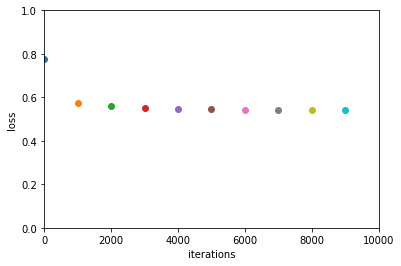

In [134]:
import matplotlib.pyplot as plt

for i in range(len(cost_history)):
    
    plt.ylim((0,1))
    plt.xlim((0,iters))
    plt.ylabel("loss")
    plt.xlabel("iterations")
    plt.scatter(cost_history[i][0], cost_history[i][1])

## Demo Part
- below is some example data that can inputted with the optimized weights and bias
- each index in the input correlates with the column of the dataframe
- tweak the input and see what results you get

In [135]:
your_data = np.array( [1, 1, 0, 5, 4, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 4, 3, 4, 1, 1, 3, 6] ).reshape(1,23)

pred = predict(your_data, weights, bias)

predicted = classify(pred)

print(predicted)

[[0]]


In [136]:
df

,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,1,0,4,4,2,2,0,1,0,...,1,0,0,4,3,4,1,1,3,6
1,1,1,1,1,1,1,2,0,0,1,...,1,1,0,5,3,3,1,1,3,4
2,1,0,1,1,1,1,2,3,1,0,...,1,1,0,4,3,2,2,3,3,10
3,1,1,1,4,2,1,3,0,0,1,...,1,1,1,3,2,2,1,1,5,2
4,1,1,1,3,3,1,2,0,0,1,...,1,0,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,0,2,2,1,2,2,0,1,...,1,0,0,5,5,4,4,5,4,11
391,1,0,1,3,1,2,1,0,0,0,...,1,1,0,2,4,5,3,4,2,3
392,0,1,1,1,1,1,1,3,0,0,...,1,0,0,5,5,3,3,3,3,3
393,0,0,1,3,2,3,1,0,0,0,...,1,1,0,4,4,1,3,4,5,0
